In [2]:
install.packages("tibbletime")
install.packages("anomalize")
library(tidyverse)
library(tibbletime)
library(anomalize)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘timetk’, ‘sweep’


══ Use anomalize to improve your Forecasts by 50%! ═════════════════════════════
Business Science offers a 1-hour course - Lab #18: Time Series Anomaly Detection!
</> Learn more at: https://university.business-science.io/p/learning-labs-pro </>



In [3]:
#Read the dataset 
anomaly <- read_csv("http://bit.ly/CarreFourSalesDataset")
head(anomaly)

Rows: 1000 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Date
dbl (1): Sales

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Date,Sales
<chr>,<dbl>
1/5/2019,548.9715
3/8/2019,80.2200
3/3/2019,340.5255
1/27/2019,489.0480
2/8/2019,634.3785
3/25/2019,627.6165


In [4]:
#Check the datatype

sapply(anomaly,class)

Date       Sales 
"character"   "numeric"

In [5]:
#Check missing values 
colSums(is.na(anomaly)) 

Date Sales 
    0     0

In [6]:
#Display the internal structure 
str(anomaly)

spec_tbl_df [1,000 × 2] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Date : chr [1:1000] "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Sales: num [1:1000] 549 80.2 340.5 489 634.4 ...
 - attr(*, "spec")=
  .. cols(
  ..   Date = col_character(),
  ..   Sales = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [7]:
#getting the frequency
frequency <- as.data.frame(table(anomaly$Date))

In [8]:
head(frequency)

,Var1,Freq
,<fct>,<int>
1,1/1/2019,12
2,1/10/2019,9
3,1/11/2019,8
4,1/12/2019,11
5,1/13/2019,10
6,1/14/2019,13


In [9]:
# convert column to date class
frequency$Var1 <- as.Date(frequency$Var1)

In [10]:
#Change datatype of varibale var1 to tbl_time for easier anomaly detection 

frequency1<- as_tbl_time(frequency, Var1)

In [11]:
head(frequency1)

Var1,Freq
<date>,<int>
1-01-20,12
1-10-20,9
1-11-20,8
1-12-20,11
NA,10
NA,13


In [12]:
#Check for missing values 
print(colSums(is.na(frequency1)))

Var1 Freq 
  53    0 


In [13]:
#Remove outliers 
newdata <- na.omit(frequency1)

In [14]:
#Confirm missing data is removed
print(colSums(is.na(newdata)))

Var1 Freq 
   0    0 


time_decompose(): Separates the time series into seasonal, trend, and remainder components

anomalize(): Applies anomaly detection methods to the remainder component.

time_recompose(): Calculates limits that separate the “normal” data from the anomalies!

In [15]:
newdata_anomalized <- newdata %>%
    time_decompose(Freq, merge = TRUE) %>%
    anomalize(remainder) %>%
    time_recompose()

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

frequency = 12 months

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

trend = 12 months

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [16]:
# see  how anomaly occured 
newdata_anomalized %>% glimpse()

Rows: 36
Columns: 11
$ Var1          <date> 1-01-20, 1-02-20, 1-03-20, 1-04-20, 1-05-20, 1-06-20, 1…
$ Freq          <int> 12, 8, 8, 6, 12, 9, 9, 18, 8, 9, 8, 11, 6, 14, 14, 11, 1…
$ observed      <dbl> 12, 9, 8, 11, 8, 8, 6, 12, 9, 9, 18, 8, 6, 11, 8, 8, 14,…
$ season        <dbl> -1.65298855, -0.22495736, -1.85490548, -0.61548453, 2.78…
$ trend         <dbl> 11.141894, 10.622076, 10.102257, 9.661878, 9.221499, 8.8…
$ remainder     <dbl> 2.51109430, -1.39711816, -0.24735131, 1.95360649, -4.003…
$ remainder_l1  <dbl> -9.85197, -9.85197, -9.85197, -9.85197, -9.85197, -9.851…
$ remainder_l2  <dbl> 10.01754, 10.01754, 10.01754, 10.01754, 10.01754, 10.017…
$ anomaly       <chr> "No", "No", "No", "No", "No", "No", "No", "No", "No", "N…
$ recomposed_l1 <dbl> -0.36306398, 0.54514849, -1.60461836, -0.80557617, 2.151…
$ recomposed_l2 <dbl> 19.50645, 20.41466, 18.26490, 19.06394, 22.02085, 19.961…


Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

frequency = 12 months

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

trend = 12 months



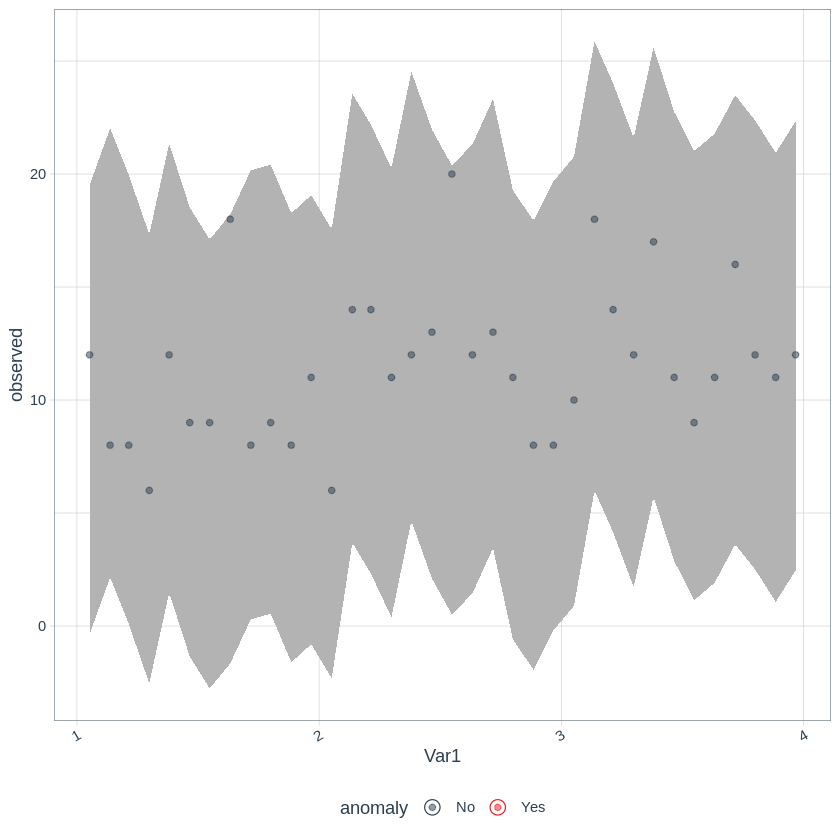

In [17]:
#Plotting
newdata %>%
    time_decompose(Freq) %>%
    anomalize(remainder) %>%
    time_recompose() %>%
    plot_anomalies(time_recomposed = TRUE, ncol = 3, alpha_dots = 0.5)

No anomaly detected

Using aggregrates

In [18]:
agregrate <- aggregate(anomaly$Sales, by= list(Date = anomaly$Date),FUN=sum)

In [19]:
head(agregrate)

,Date,x
,<chr>,<dbl>
1,1/1/2019,4745.181
2,1/10/2019,3560.949
3,1/11/2019,2114.963
4,1/12/2019,5184.764
5,1/13/2019,2451.204
6,1/14/2019,3966.617


In [20]:
# convert column to date class
agregrate$Date <- as.Date(agregrate$Date)

In [21]:
#Change datatype of varibale var1 to tbl_time for easier anomaly detection 

frequency2<- as_tbl_time(agregrate, Date)

In [22]:
head(frequency2)

Date,x
<date>,<dbl>
1-01-20,4745.181
1-10-20,3560.949
1-11-20,2114.963
1-12-20,5184.764
NA,2451.204
NA,3966.617


In [23]:
#Check for missing values 
print(colSums(is.na(frequency2)))

Date    x 
  53    0 


In [24]:
#Remove outliers 
newdata1 <- na.omit(frequency2)

In [25]:
#Confirm missing data is removed
print(colSums(is.na(newdata1)))

Date    x 
   0    0 


time_decompose(): Separates the time series into seasonal, trend, and remainder components

anomalize(): Applies anomaly detection methods to the remainder component.

time_recompose(): Calculates limits that separate the “normal” data from the anomalies!

In [26]:
newdata_anomalized1 <- newdata1 %>%
    time_decompose(x, merge = TRUE) %>%
    anomalize(remainder) %>%
    time_recompose()

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

frequency = 12 months

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

trend = 12 months



In [27]:
# see  how anomaly occured 
newdata_anomalized1 %>% glimpse()

Rows: 36
Columns: 11
$ Date          <date> 1-01-20, 1-02-20, 1-03-20, 1-04-20, 1-05-20, 1-06-20, 1…
$ x             <dbl> 4745.181, 1945.503, 2078.128, 1623.688, 3536.684, 3614.2…
$ observed      <dbl> 4745.181, 3560.949, 2114.963, 5184.764, 1945.503, 2078.1…
$ season        <dbl> -583.0702, -454.9516, -1319.0802, 331.6722, 843.7655, 19…
$ trend         <dbl> 4604.521, 4445.091, 4285.661, 4128.366, 3971.071, 3836.0…
$ remainder     <dbl> 723.730088, -429.190154, -851.617845, 724.725759, -2869.…
$ remainder_l1  <dbl> -3049.875, -3049.875, -3049.875, -3049.875, -3049.875, -…
$ remainder_l2  <dbl> 3411.863, 3411.863, 3411.863, 3411.863, 3411.863, 3411.8…
$ anomaly       <chr> "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "…
$ recomposed_l1 <dbl> 971.57553, 940.26377, -83.29504, 1410.16236, 1764.96066,…
$ recomposed_l2 <dbl> 7433.314, 7402.002, 6378.444, 7871.901, 8226.699, 9232.9…


Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

frequency = 12 months

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

trend = 12 months



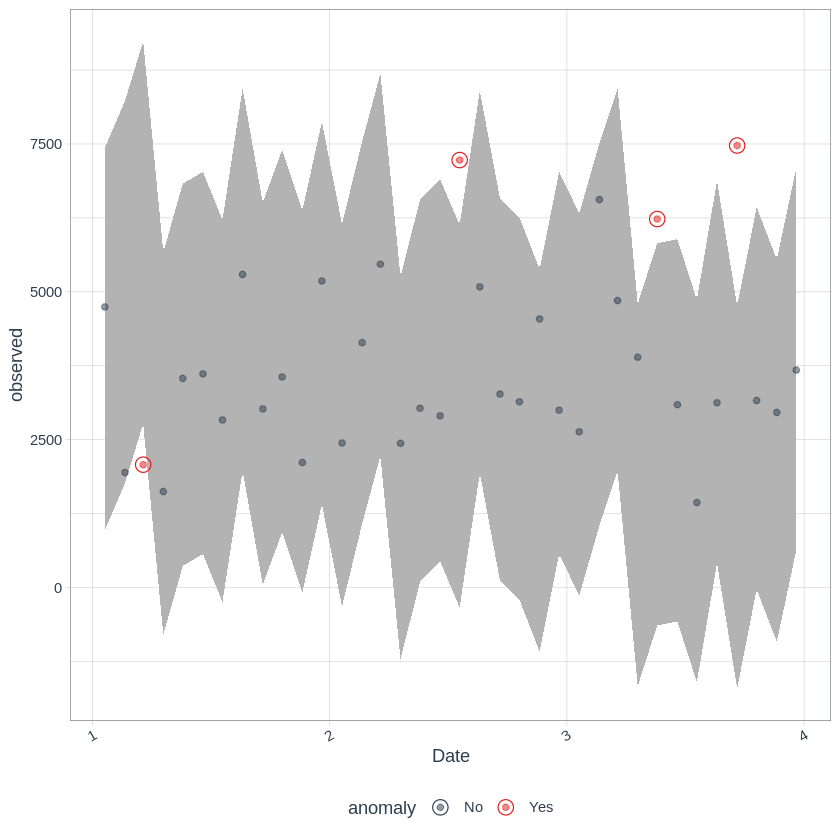

In [28]:
#Plotting
newdata1 %>%
    time_decompose(x) %>%
    anomalize(remainder) %>%
    time_recompose() %>%
    plot_anomalies(time_recomposed = TRUE, ncol = 3, alpha_dots = 0.5)

Finding the Anomalies in aggregrates

In [29]:
newdata1 %>% 
  time_decompose(x) %>%
  anomalize(remainder) %>%
  time_recompose() %>%
  filter(anomaly == 'Yes') 

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

frequency = 12 months

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

trend = 12 months



Date,observed,season,trend,remainder,remainder_l1,remainder_l2,anomaly,recomposed_l1,recomposed_l2
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1-03-20,2078.128,1985.0570,3836.010,-3742.938,-3049.875,3411.863,Yes,2771.1916,9232.930
2-07-20,7228.211,-651.1913,3369.180,4510.222,-3049.875,3411.863,Yes,-331.8868,6129.852
3-05-20,6230.878,-174.4396,2585.101,3820.217,-3049.875,3411.863,Yes,-639.2142,5822.525
3-09-20,7474.047,-270.9205,1614.603,6130.364,-3049.875,3411.863,Yes,-1706.1927,4755.546
